# Superhero (and Supervillain) Name Generator

---

[Superhero Names Dataset](https://github.com/am1tyadav/superhero)

In [4]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00


## Task 2

1. Import the data
2. Create a tokenizer
3. Char to index and Index to char dictionaries

In [1]:
!git clone https://github.com/am1tyadav/superhero

Cloning into 'superhero'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 47.08 KiB | 1.88 MiB/s, done.


In [2]:
with open('/content/superhero/superheroes.txt','r') as f:
  data = f.read()
data[:100]

'jumpa\t\ndoctor fate\t\nstarlight\t\nisildur\t\nlasher\t\nvarvara\t\nthe target\t\naxel\t\nbattra\t\nchangeling\t\npyrrh'

In [5]:
#Character-level Language Model
import tensorflow as tf
print(tf.__version__)

2.19.0


In [6]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    split='\n',
)

In [7]:
#Converting sequence of characters to sequence of numbers
tokenizer.fit_on_texts(data)

In [8]:
char_to_index=tokenizer.word_index
index_to_char = dict((v,k) for k,v in char_to_index.items())

print(index_to_char)

{1: '\t', 2: 'a', 3: 'e', 4: 'r', 5: 'o', 6: 'n', 7: 'i', 8: ' ', 9: 't', 10: 's', 11: 'l', 12: 'm', 13: 'h', 14: 'd', 15: 'c', 16: 'u', 17: 'g', 18: 'k', 19: 'b', 20: 'p', 21: 'y', 22: 'w', 23: 'f', 24: 'v', 25: 'j', 26: 'z', 27: 'x', 28: 'q'}


## Task 3

1. Converting between names and sequences

In [ ]:
names = data.splitlines()
names[:10]

['jumpa\t',
 'doctor fate\t',
 'starlight\t',
 'isildur\t',
 'lasher\t',
 'varvara\t',
 'the target\t',
 'axel\t',
 'battra\t',
 'changeling\t']

In [ ]:
tokenizer.texts_to_sequences(names[0])

[[25], [16], [12], [20], [2], [1]]

In [ ]:
def name_to_seq(name):
  return [tokenizer.texts_to_sequences(c)[0][0] for c in name]

In [ ]:
name_to_seq(names[0])

[25, 16, 12, 20, 2, 1]

In [ ]:
def seq_to_name(seq):
  return ''.join( [index_to_char[i] for i in seq if (i!=0)])

In [ ]:
seq_to_name(name_to_seq(names[0]))

'jumpa\t'

## Task 4

1. Creating sequences
2. Padding all sequences

In [ ]:
sequences =[]
for name in names:
  seq=name_to_seq(name)  #we are not creating labels right now , so to ensure that each names are of atleast 2 chars
  if len(seq)>=2:
    sequences+=[seq[:i] for i in range(2,len(seq)+1)] #stores numeric of each char


In [ ]:
sequences[:30]

[[25, 16],
 [25, 16, 12],
 [25, 16, 12, 20],
 [25, 16, 12, 20, 2],
 [25, 16, 12, 20, 2, 1],
 [14, 5],
 [14, 5, 15],
 [14, 5, 15, 9],
 [14, 5, 15, 9, 5],
 [14, 5, 15, 9, 5, 4],
 [14, 5, 15, 9, 5, 4, 8],
 [14, 5, 15, 9, 5, 4, 8, 23],
 [14, 5, 15, 9, 5, 4, 8, 23, 2],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9, 3],
 [14, 5, 15, 9, 5, 4, 8, 23, 2, 9, 3, 1],
 [10, 9],
 [10, 9, 2],
 [10, 9, 2, 4],
 [10, 9, 2, 4, 11],
 [10, 9, 2, 4, 11, 7],
 [10, 9, 2, 4, 11, 7, 17],
 [10, 9, 2, 4, 11, 7, 17, 13],
 [10, 9, 2, 4, 11, 7, 17, 13, 9],
 [10, 9, 2, 4, 11, 7, 17, 13, 9, 1],
 [7, 10],
 [7, 10, 7],
 [7, 10, 7, 11],
 [7, 10, 7, 11, 14],
 [7, 10, 7, 11, 14, 16]]

In [ ]:
#To know maximum length of sequences - so that we can have fixed length input value to model
max_len = max([len (x) for x in sequences])
print(max_len)

33


In [ ]:
#Pad sequences of smaller length with zero
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences,padding='pre',
    maxlen=max_len
)
print(padded_sequences[0]) #pre-padded bcz it   makes easier when creating labels

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 25 16]


In [ ]:
padded_sequences.shape #(we have 88279 sequences each of length 33)

(88279, 33)

## Task 5: Creating Training and Validation Sets

1. Creating training and validation sets

In [ ]:
#converting to examples and labels
x,y =padded_sequences[:,:-1],padded_sequences[:,-1] #until last one but not including the last one
#Now we have the next char in y which is we are going to predict and in x the seq of numerics


In [ ]:
print(x.shape,y.shape)

(88279, 32) (88279,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(66209, 32) (66209,)
(22070, 32) (22070,)


In [ ]:
#To get size of vocabulary we have (+1 to count the zero we've added to vocab)
num_chars = len(char_to_index.keys())+1
print(num_chars)

29


## Task 6: Creating the Model

In [ ]:
import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, LSTM
from tensorflow.keras.layers import Bidirectional, Dense

num_chars = 29
max_len = 33
Embedding(input_dim=num_chars, output_dim=8, input_shape=(max_len - 1,))

model = Sequential([
        Embedding(input_dim=num_chars,output_dim=8,input_length = (max_len-1)),
        Conv1D(64, 5 , strides=1,activation='tanh',padding='causal'),
        MaxPool1D(2),
        LSTM(32),
        Dense(num_chars,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.build(input_shape=(None, max_len - 1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 32, 8)          │           232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 32, 64)         │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 29)             │           957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,229 (63.39 KB)

 Trainable params: 16,229 (63.39 KB)

 Non-trainable params: 0 (0.00 B)

padding
string, "*valid*", "*same*" or "*causal*"(case-insensitive). "valid" means no padding. "*same"* results in padding evenly to the left/right or up/down of the input. When *padding="same*" and strides=1, the output has the same size as the input.
"*causal*" results in causal(dilated) convolutions, e.g. output[t] does not depend on input[t+1:]. Useful when modeling temporal data where the model should not violate the temporal order.

## Task 7: Training the Model

In [ ]:
h=model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=50,verbose=2,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)
    ]
)

Epoch 1/50
2070/2070 - 18s - 9ms/step - accuracy: 0.1866 - loss: 2.7604 - val_accuracy: 0.2189 - val_loss: 2.6125
Epoch 2/50
2070/2070 - 16s - 8ms/step - accuracy: 0.2298 - loss: 2.5562 - val_accuracy: 0.2411 - val_loss: 2.5230
Epoch 3/50
2070/2070 - 16s - 8ms/step - accuracy: 0.2509 - loss: 2.4803 - val_accuracy: 0.2568 - val_loss: 2.4606
Epoch 4/50
2070/2070 - 17s - 8ms/step - accuracy: 0.2657 - loss: 2.4296 - val_accuracy: 0.2650 - val_loss: 2.4256
Epoch 5/50
2070/2070 - 17s - 8ms/step - accuracy: 0.2723 - loss: 2.3923 - val_accuracy: 0.2743 - val_loss: 2.3896
Epoch 6/50
2070/2070 - 16s - 8ms/step - accuracy: 0.2822 - loss: 2.3594 - val_accuracy: 0.2778 - val_loss: 2.3691
Epoch 7/50
2070/2070 - 16s - 8ms/step - accuracy: 0.2899 - loss: 2.3316 - val_accuracy: 0.2889 - val_loss: 2.3445
Epoch 8/50
2070/2070 - 16s - 8ms/step - accuracy: 0.2994 - loss: 2.3051 - val_accuracy: 0.2920 - val_loss: 2.3321
Epoch 9/50
2070/2070 - 16s - 8ms/step - accuracy: 0.3062 - loss: 2.2819 - val_accuracy: 

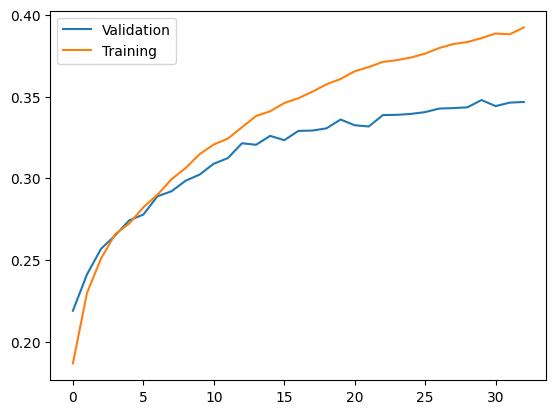

In [ ]:
from matplotlib import pyplot as plt
epochs_range =len(h.history['loss'])

plt.plot(range(0,epochs_range),h.history['val_accuracy'],label='Validation')
plt.plot(range(0,epochs_range),h.history['accuracy'],label='Training')
plt.legend()
plt.show()

## Task 8: Generate Names!

In [ ]:
def generate_names(seed):
  for i in range(0,40):
    seq = name_to_seq(seed)
    padded = tf.keras.preprocessing.sequence.pad_sequences([seq],padding='pre',
                                                           maxlen=max_len-1,
                                                           truncating='pre')
    pred = model.predict(padded)[0]
    pred_char = index_to_char[tf.argmax(pred).numpy()]
    seed+=pred_char
    if pred_char == '\t':
      break
  print(seed)



In [ ]:
generate_names('se')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
sentile	


In [ ]:
generate_names('fa')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
farana	


In [ ]:
generate_names('mar')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
marter shark	


In [ ]:
generate_names('r')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
rander stre	


In [ ]:
generate_names('ze')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
zellen carris	
